<font color="#800080"><u><font size=15>**Image Classification using Transfer Learning and ResNet50**</font></u>

**Readme:**<br> <font color="red">***Do this when you've once created a model, saved it, zipped it, and downloaded it to your system.*** </font><br>
<font color="green">**Now we want to use the already saved model. </font>**<br>
1- First upload workspace.zip in colab, unzip it.<br>
2- Execute the code:
model = tf.keras.models.load_model('/content/workspace/saved_model/my_model')
model.summary()<br>
3- Reload Cell # python librairies installation<br>
4- Reload Cell # display, transform, read, split ...<br>
5- Reload Cell # define classes name<br>
6- Upload an image in Colab<br>
7- Execute Code: #test the new image (Give path of the image uploaded in Colab)<br>
8- Execute Code: # generate predictions for samples<br>
9- Execute Code: # generate argmax for predictions<br>
10- Execute Code: # transform classes number into classes name<br>

**Step 1 - Librairies installation and import**

In [3]:
# python librairies installation
!pip install split-folders matplotlib opencv-python spicy

In [4]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

**Dataset:**<br>
For data.zip, the folders are as follows:<br>
-data (Main folder)<br>
-subfolders include daisy, dandelion, roses, sunflowers, tulips. <br>Each contain a set of images.<br>
<font color="red">Please Note: The folders are not split into train, test, and validation. We will split the images ourself into train, test and validation through code.</font>

In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/daisy/
  inflating: data/daisy/100080576_f52e8ee070_n.jpg  
  inflating: data/daisy/10140303196_b88d3d6cec.jpg  
  inflating: data/daisy/10172379554_b296050f82_n.jpg  
  inflating: data/daisy/10172567486_2748826a8b.jpg  
  inflating: data/daisy/10172636503_21bededa75_n.jpg  
  inflating: data/daisy/102841525_bd6628ae3c.jpg  
  inflating: data/daisy/1031799732_e7f4008c03.jpg  
  inflating: data/daisy/10391248763_1d16681106_n.jpg  
  inflating: data/daisy/10437754174_22ec990b77_m.jpg  
  inflating: data/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: data/daisy/10437929963_bc13eebe0c.jpg  
  inflating: data/daisy/10466290366_cc72e33532.jpg  
  inflating: data/daisy/10466558316_a7198b87e2.jpg  
  inflating: data/daisy/10555749515_13a12a026e.jpg  
  inflating: data/daisy/10555815624_dc211569b0.jpg  
  inflating: data/daisy/10555826524_423eb8bf71_n.jpg  
  inflating: data/daisy/10559679065_50d2b16f6d.jpg  
  inflating: data/daisy/105

In [ ]:
!ls

data  data.zip	sample_data


**Step 2 - Data** **preprocessing**

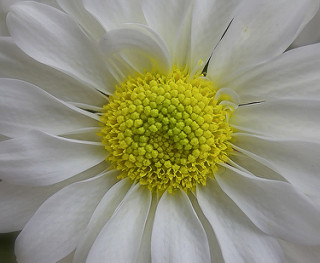

In [ ]:
# daisy
img_daisy = image.load_img("/content/data/daisy/100080576_f52e8ee070_n.jpg")
img_daisy

In [ ]:
# split data in a new folder named data-split
splitfolders.ratio("/content/data", output="/content/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)


Copying files: 3590 files [00:01, 2441.55 files/s]


**3. Create Keras data generators**

In [ ]:
datagen = ImageDataGenerator()

In [11]:
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

In [ ]:
# training data
train_generator = datagen.flow_from_directory(
    directory="/content/data-split/train/",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 2511 images belonging to 5 classes.


In [ ]:
# validation data
valid_generator = datagen.flow_from_directory(
    directory="/content/data-split/val/",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 716 images belonging to 5 classes.


In [ ]:
# test data
test_generator = datagen.flow_from_directory(
    directory="/content/data-split/test/",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 363 images belonging to 5 classes.


In [ ]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

**Step 4 - Train the model**

In [ ]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [ ]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
79/79 [==============================] - 647s 8s/step - loss: 0.3782 - accuracy: 0.8833 - val_loss: 0.4054 - val_accuracy: 0.8827
Epoch 2/10
79/79 [==============================] - 630s 8s/step - loss: 0.3110 - accuracy: 0.9044 - val_loss: 0.4037 - val_accuracy: 0.8939
Epoch 3/10
79/79 [==============================] - 634s 8s/step - loss: 0.3063 - accuracy: 0.9060 - val_loss: 0.4060 - val_accuracy: 0.8911
Epoch 4/10
79/79 [==============================] - 627s 8s/step - loss: 0.2836 - accuracy: 0.9072 - val_loss: 0.5550 - val_accuracy: 0.8743
Epoch 5/10
79/79 [==============================] - 628s 8s/step - loss: 0.2667 - accuracy: 0.9251 - val_loss: 0.4351 - val_accuracy: 0.8911
Epoch 6/10
79/79 [==============================] - 631s 8s/step - loss: 0.2785 - accuracy: 0.9084 - val_loss: 0.3781 - val_accuracy: 0.8883
Epoch 7/10
79/79 [==============================] - 640s 8s/step - loss: 0.2671 - accuracy: 0.9235 - val_loss: 0.4435 - val_accuracy: 0.8911
Epoch 8/10
79

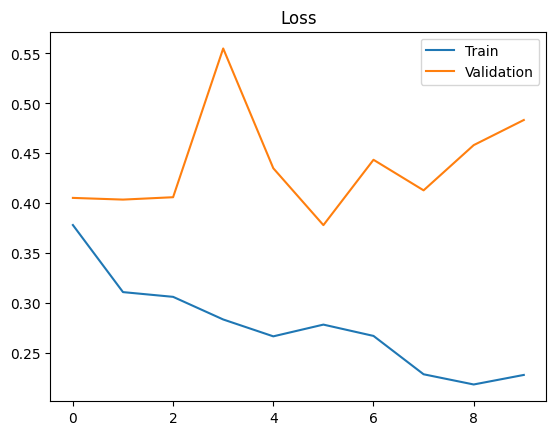

In [ ]:
#display loss curves
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

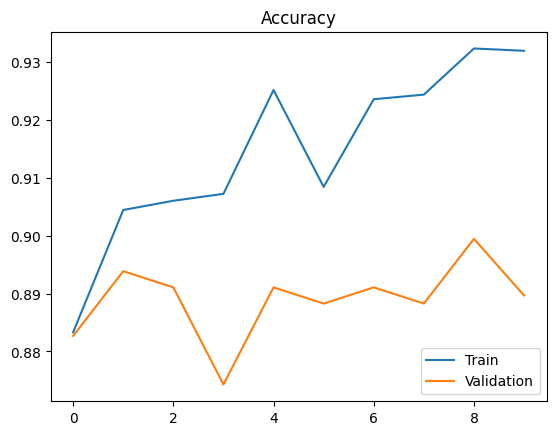

In [ ]:
#display accuracy curves
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

**Step 4 - Train the model**

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

12/12 [==============================] - 89s 7s/step - loss: 0.4711 - accuracy: 0.8815
The test loss is:  0.47107407450675964
The best accuracy is:  88.15426826477051


**Step 6 - Test the model on a new image**

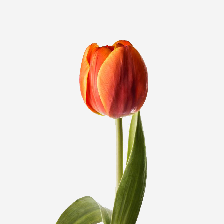

In [5]:
#test the new image
img = tf.keras.preprocessing.image.load_img('/content/dutch_tulip_persimmon_dutch_tulip_stem_2.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array])
img

In [7]:
model = tf.keras.models.load_model('/content/workspace/saved_model/my_model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [8]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 2s 2s/step
[[0.00214439 0.00260862 0.07794979 0.00321517 0.91408205]]


In [9]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[4]


In [12]:
# transform classes number into classes name
class_names[class_id.item()]

'tulips'

**Step 7 - Save and export the model**

In [ ]:
#save and export the model

model.save('/workspace/saved_model/my_model')

In [ ]:
# my_model directory
%ls /workspace/saved_model/

my_model/


In [ ]:
# contains an assets folder, saved_model.pb, and variables folder
%ls /workspace/saved_model/my_model

assets/  fingerprint.pb  keras_metadata.pb  saved_model.pb  variables/


In [ ]:
model = tf.keras.models.load_model('/workspace/saved_model/my_model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

<font color="magenta">**Zip the Saved Model and Download it**</font>

In [ ]:
!zip -r workspace.zip /workspace/

  adding: workspace/ (stored 0%)
  adding: workspace/saved_model/ (stored 0%)
  adding: workspace/saved_model/my_model/ (stored 0%)
  adding: workspace/saved_model/my_model/fingerprint.pb (stored 0%)
  adding: workspace/saved_model/my_model/saved_model.pb (deflated 92%)
  adding: workspace/saved_model/my_model/variables/ (stored 0%)
  adding: workspace/saved_model/my_model/variables/variables.index (deflated 80%)
  adding: workspace/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: workspace/saved_model/my_model/keras_metadata.pb (deflated 96%)
  adding: workspace/saved_model/my_model/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('workspace.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<font color="green">**Testing images**</font>

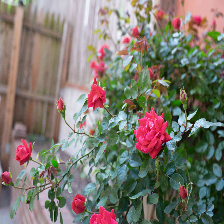

In [ ]:
#test the new image
img = tf.keras.preprocessing.image.load_img('/content/types-of-roses-4069722-hero-17f5468ab53b4622b27e3d96534105db.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array])
img

In [ ]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 2s 2s/step
[[2.8468164e-06 3.2463313e-07 9.8369008e-01 2.6783210e-04 1.6038960e-02]]


In [ ]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[2]


In [ ]:
# transform classes number into classes name
class_names[class_id.item()]

'roses'

<font color="red">**Unzip Workspace.zip**</font>

In [2]:
!unzip workspace.zip

Archive:  workspace.zip
   creating: workspace/
   creating: workspace/saved_model/
   creating: workspace/saved_model/my_model/
 extracting: workspace/saved_model/my_model/fingerprint.pb  
  inflating: workspace/saved_model/my_model/saved_model.pb  
   creating: workspace/saved_model/my_model/variables/
  inflating: workspace/saved_model/my_model/variables/variables.index  
  inflating: workspace/saved_model/my_model/variables/variables.data-00000-of-00001  
  inflating: workspace/saved_model/my_model/keras_metadata.pb  
   creating: workspace/saved_model/my_model/assets/
